In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
import math


data = pd.read_csv ("breast-cancer.csv")
dframe = pd.DataFrame(data)
le = LabelEncoder()
le.fit(dframe['diagnosis'])
dframe['diagnosis'] = le.transform(dframe['diagnosis'])
dframe.drop('id',axis=1,inplace=True)
display(dframe)
print(dframe.duplicated().to_string())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [2]:
dframe['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

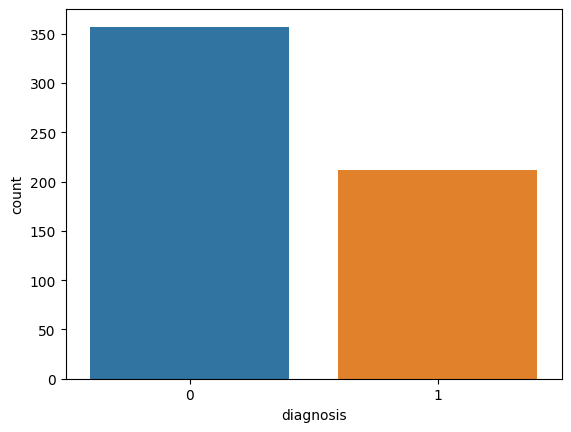

In [3]:
sns.countplot(x ='diagnosis', data = dframe)

Text(0.5, 1.0, 'Features Correlating with Diagnosis')

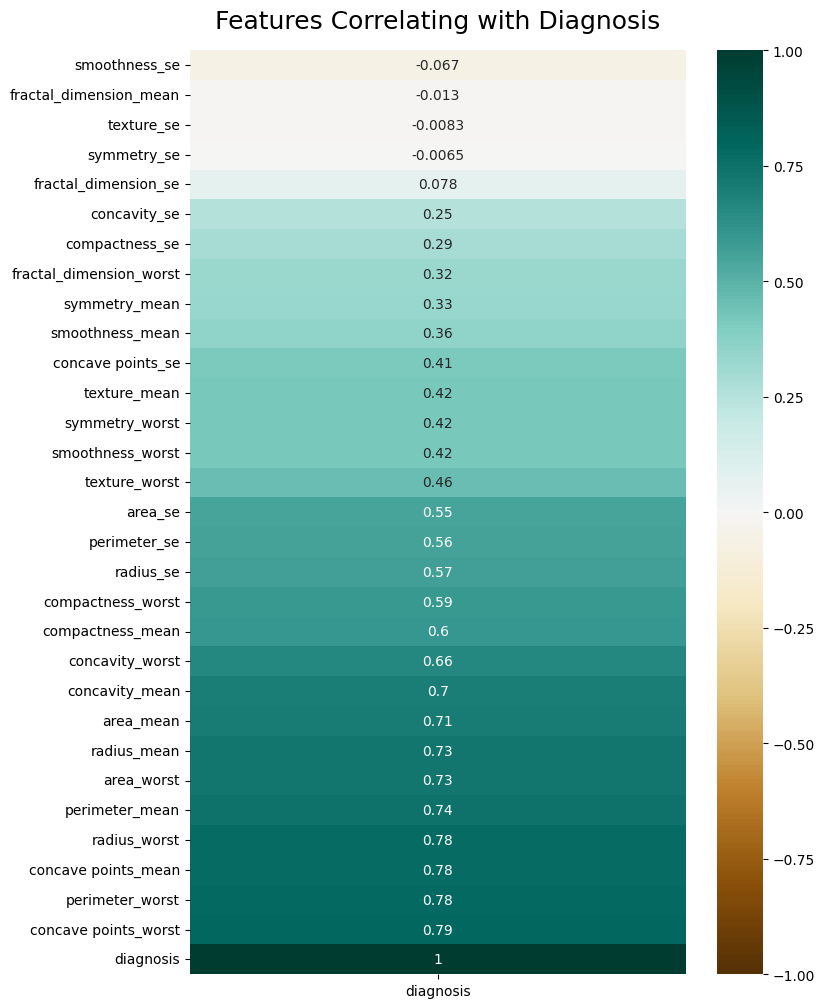

In [4]:
dframe.corr()[['diagnosis']].sort_values(by='diagnosis')
pl.figure(figsize=(8, 12))
heatmap = sns.heatmap(dframe.corr()[['diagnosis']].sort_values(by='diagnosis'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Diagnosis', fontdict={'fontsize':18}, pad=16)

In [5]:
#Splitting dataset into 80% training and 20% testing
dframe.drop(['smoothness_se','fractal_dimension_mean','texture_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)
x=dframe.iloc[:,1:]
y=dframe.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Decision Tree

In [6]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

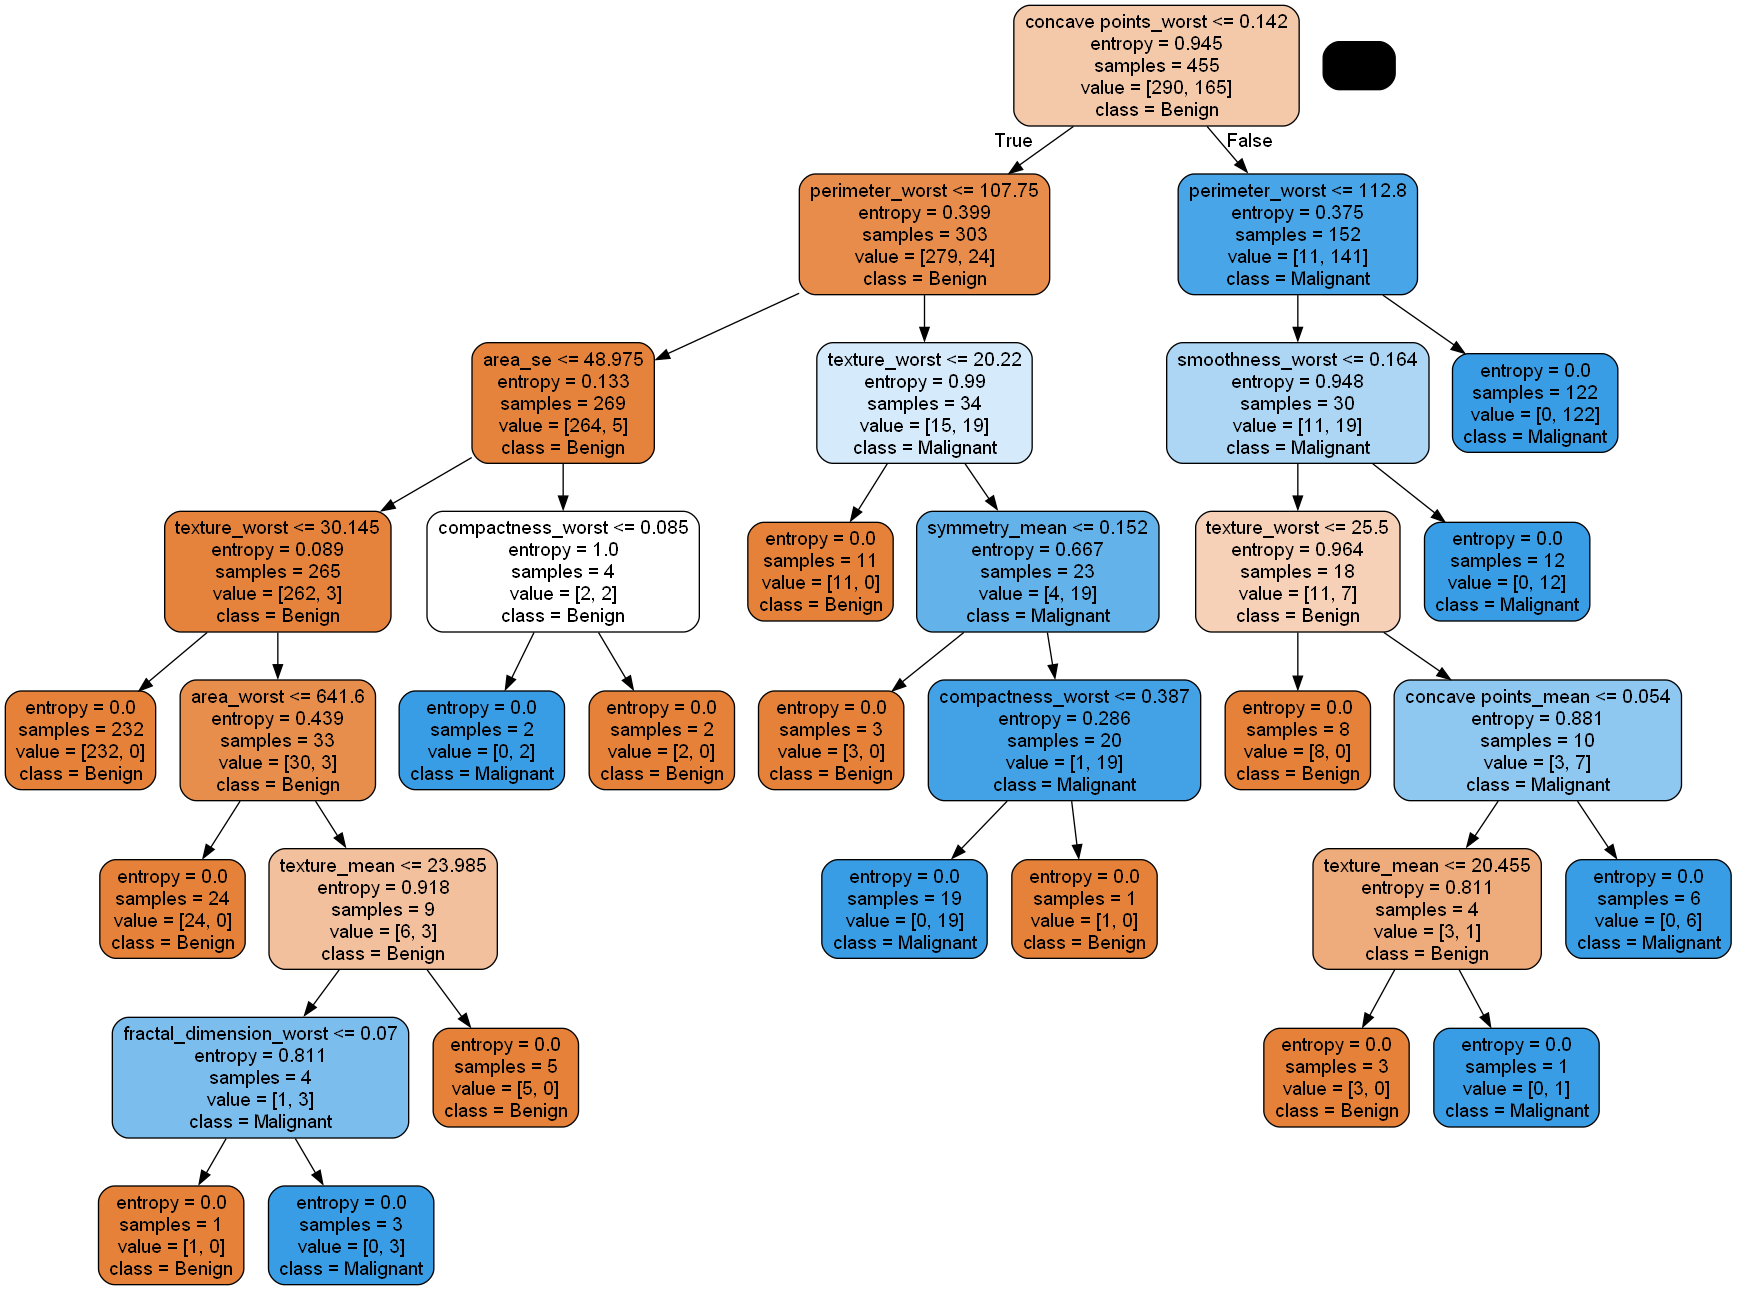

In [7]:
Names=list(x.columns.values)
dot_data = tree.export_graphviz(dt, filled=True, rounded=True,feature_names=Names,class_names=['Benign','Malignant'])
                                
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

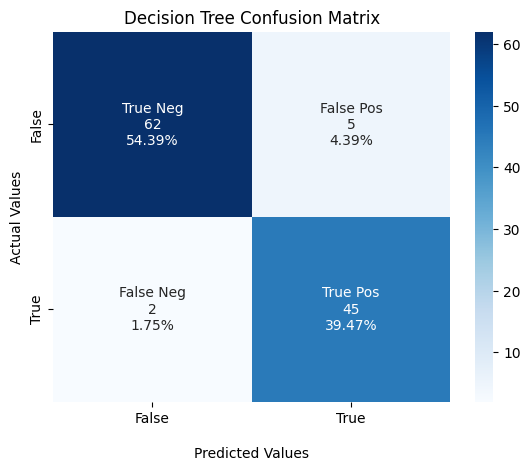

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Decision Tree Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
pl.show()

In [9]:
tree_accuracy=accuracy_score(y_test,y_pred)
tree_precision=precision_score(y_test, y_pred)
tree_recall=recall_score(y_test, y_pred)
tree_error=(1-accuracy_score(y_test,y_pred))
tree_spec=recall_score(y_test, y_pred, pos_label=0)
print("Acuracy score: ",tree_accuracy)
print("Precision score: ",tree_precision) #not very useful
print("Recall Score: ",tree_recall) 
print("Error Rate: ",tree_error)
print('Specificity : ',tree_spec)

#Recall, sensitivity or true positive rate (TPR) gives us a measure for how many of the real “true” values we detected. 
#When we want to keep the false positives to a minimum, we want to increase the precision of our model, and when we want to reduce false negatives, we want to increase the recall.

Acuracy score:  0.9385964912280702
Precision score:  0.9
Recall Score:  0.9574468085106383
Error Rate:  0.06140350877192979
Specificity :  0.9253731343283582


KNN

In [10]:
#take nearest odd number for accuracy
math.sqrt(len(y_test))

10.677078252031311

c:\Users\bisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(50.722222222222214, 0.5, 'Actual Values')

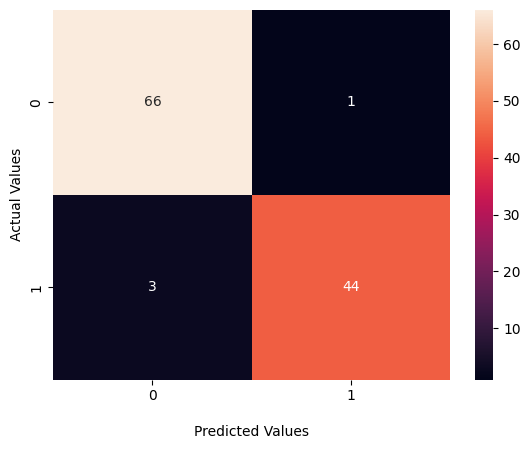

In [11]:
knn = KNeighborsClassifier(n_neighbors=9)
#training model
knn.fit(x_train, y_train)

#confusion matrix
y_pred= knn.predict(x_test)
output= confusion_matrix(y_test, y_pred)
sns.heatmap(output, annot=True)
pl.xlabel('\nPredicted Values')
pl.ylabel('Actual Values')

In [12]:
knn_accuracy=accuracy_score(y_test, y_pred)
knn_precision=precision_score(y_test, y_pred)
knn_recall=recall_score(y_test, y_pred)
knn_error=(1-accuracy_score(y_test,y_pred))
knn_spec=recall_score(y_test, y_pred, pos_label=0)
print("Accuracy score: ",knn_accuracy)
print("Precision score: ",knn_precision) 
print("Recall Score: ",knn_recall) 
print("Error Rate: ",knn_error)
print('Specificity : ',knn_spec)

Accuracy score:  0.9649122807017544
Precision score:  0.9777777777777777
Recall Score:  0.9361702127659575
Error Rate:  0.03508771929824561
Specificity :  0.9850746268656716


Gaussian Naive Bayes

c:\Users\bisho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(50.722222222222214, 0.5, 'Actual Values')

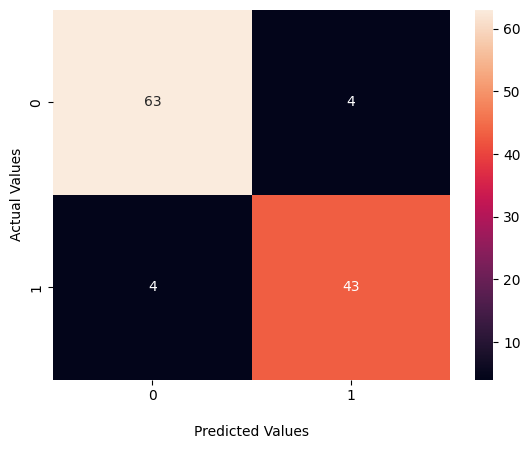

In [13]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred= gnb.predict(x_test)
output = confusion_matrix(y_test, y_pred)
sns.heatmap(output, annot=True)
pl.xlabel('\nPredicted Values')
pl.ylabel('Actual Values')

In [14]:
bayesian_accuracy=accuracy_score(y_test, y_pred)
bayesian_precision=precision_score(y_test, y_pred)
bayesian_recall=recall_score(y_test, y_pred)
bayesian_error=(1-accuracy_score(y_test,y_pred))
bayesian_spec=recall_score(y_test, y_pred, pos_label=0)
print("Acuracy score: ",bayesian_accuracy)
print("Precision score: ",bayesian_precision) 
print("Recall Score: ",bayesian_recall) 
print("Error Rate: ",bayesian_error)
print('Specificity : ',bayesian_spec)

Acuracy score:  0.9298245614035088
Precision score:  0.9148936170212766
Recall Score:  0.9148936170212766
Error Rate:  0.07017543859649122
Specificity :  0.9402985074626866


Conclusion

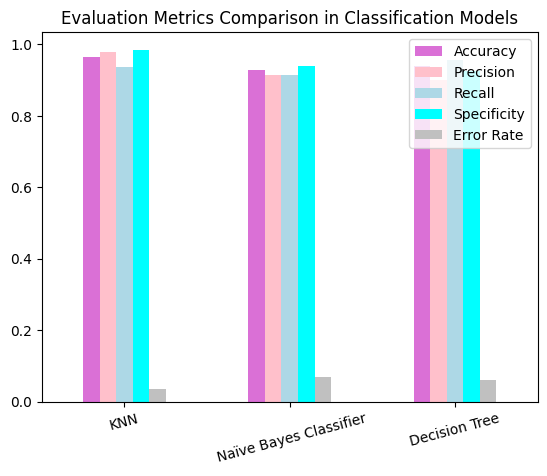

In [15]:
data={"Accuracy":[knn_accuracy,bayesian_accuracy,tree_accuracy],
     "Precision":[knn_precision,bayesian_precision,tree_precision],
     "Recall":[knn_recall,bayesian_recall,tree_recall],
     "Specificity":[knn_spec,bayesian_spec,tree_spec],
     "Error Rate":[knn_error,bayesian_error,tree_error]}
index=["KNN"," Naïve Bayes Classifier","Decision Tree"]
dataframe=pd.DataFrame(data=data,index=index)
dataframe.plot.bar(rot=15,title="Evaluation Metrics Comparison in Classification Models",color=['orchid','pink','lightblue','aqua','silver'])
pl.rcParams["figure.figsize"] = (15,10)
pl.show(block=True)